In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Data set




In [4]:
#columns name's from the data file
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1","fAsym","fM3Long", "fM3Trans", "fAlpha:", "fDist", "class"]
#reads the data file and provides the lables
df = pd.read_csv("magic04.data", names = cols)
#shows the first five rows
df.head(5)




,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha:,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
#Tranlates our g and f into a 1/0
df["class"] = (df["class"] == "g").astype(int)


In [6]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha:,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


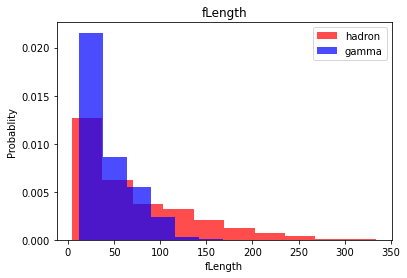

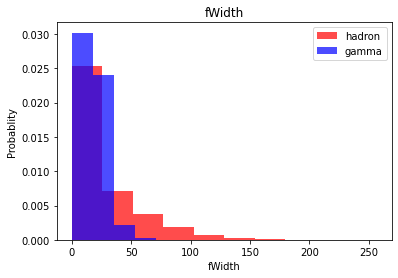

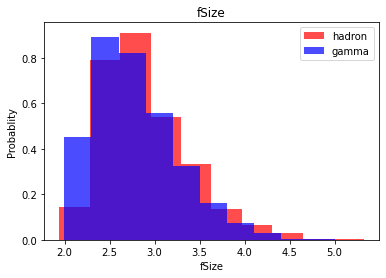

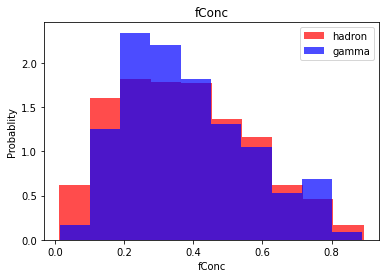

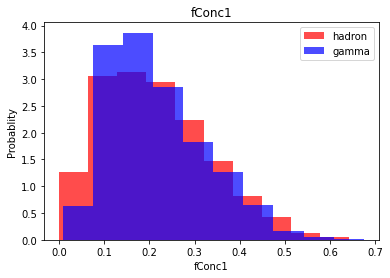

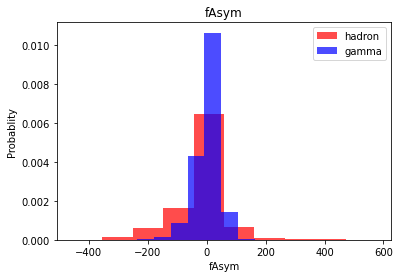

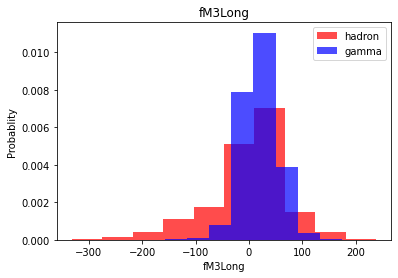

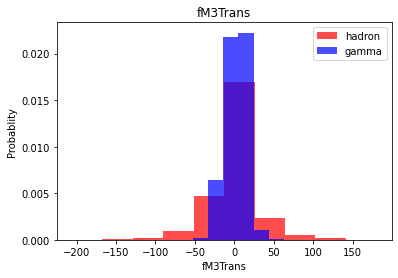

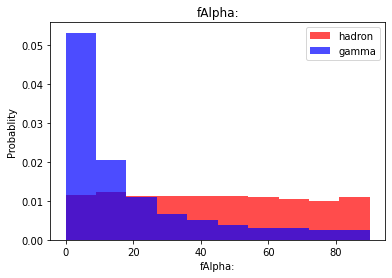

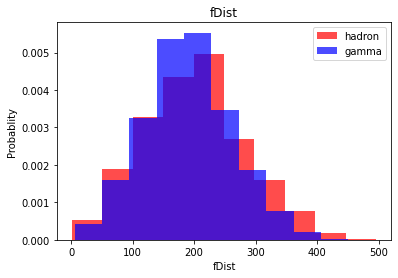

In [7]:
for label in cols[:-1]:
  #creates a histogram of each column
  plt.hist(df[df["class"] == 0][label], color = 'red', label ='hadron', alpha = .7, density = True)
  plt.hist(df[df["class"] == 1][label], color = 'blue', label ='gamma', alpha = .7, density = True)
  plt.title(label)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()


Train, validation, test datasets

In [8]:
#between 60-80% of data will be validation data
#and 10-20% will be testing data
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [9]:
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x,y) #take lesser class and keep sampling
                                #to increase the size so they can match

  #horizonatally stack to arrays
  data = np.hstack((x,np.reshape(y, (-1,1))))

  return data, x, y


In [10]:
train, x_train, y_train = scale_dataset(train, oversample = True)
valid, x_valid, y_valid = scale_dataset(valid, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample=False)


Applying our data to a kNN implemntation

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(x_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1345
           1       0.83      0.89      0.86      2459

    accuracy                           0.81      3804
   macro avg       0.80      0.77      0.78      3804
weighted avg       0.81      0.81      0.80      3804



Naives Bayes implemnetation

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [23]:
y_pred = nb_model.predict(x_test)

In [24]:
#show how well our training has done
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.39      0.48      1345
           1       0.72      0.88      0.80      2459

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.70      0.71      0.68      3804

